In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df = pd.read_csv('../data/placement.csv')

In [34]:
df.shape

(1000, 3)

In [35]:
df.sample(5)

,cgpa,placement_exam_marks,placed
340,7.45,51.0,0
714,7.06,19.0,1
301,7.84,5.0,1
959,6.76,27.0,1
695,6.75,11.0,1


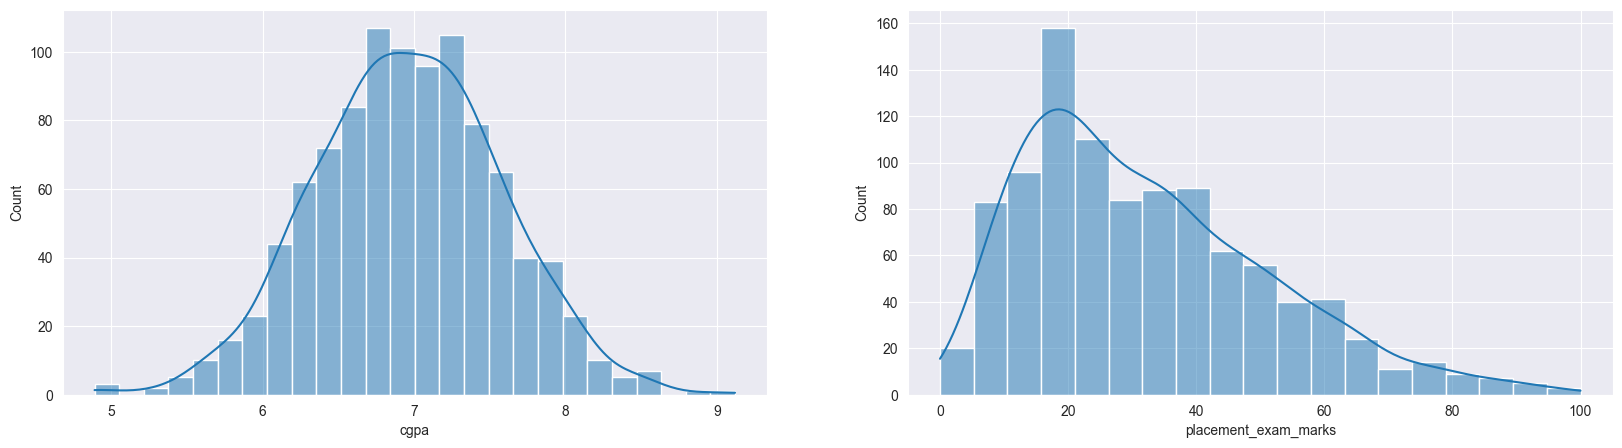

In [36]:
plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
sns.histplot(df['cgpa'], kde=True)

plt.subplot(1,2,2)
sns.histplot(df['placement_exam_marks'], kde=True)

plt.show()

In [37]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<Axes: xlabel='placement_exam_marks'>

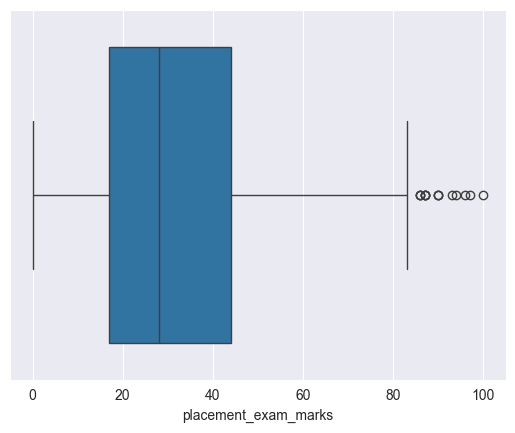

In [38]:
#Finding boundary
sns.boxplot(x=df['placement_exam_marks'])

In [39]:
# Finding the IQR
percentile25 = df['placement_exam_marks'].quantile(0.25)
percentile75 = df['placement_exam_marks'].quantile(0.75)

In [40]:
print(percentile25)

17.0


In [41]:
print(percentile75)

44.0


In [42]:
iqr = percentile75 - percentile25

In [43]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [45]:
print('Upper Limit', upper_limit)
print('Lower Limit', lower_limit)

Upper Limit 84.5
Lower Limit -23.5


In [46]:
df[df['placement_exam_marks'] > upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [47]:
df[df['placement_exam_marks'] < lower_limit]

,cgpa,placement_exam_marks,placed


In [48]:
new_df = df[df['placement_exam_marks'] < upper_limit]

In [49]:
new_df.shape

(985, 3)

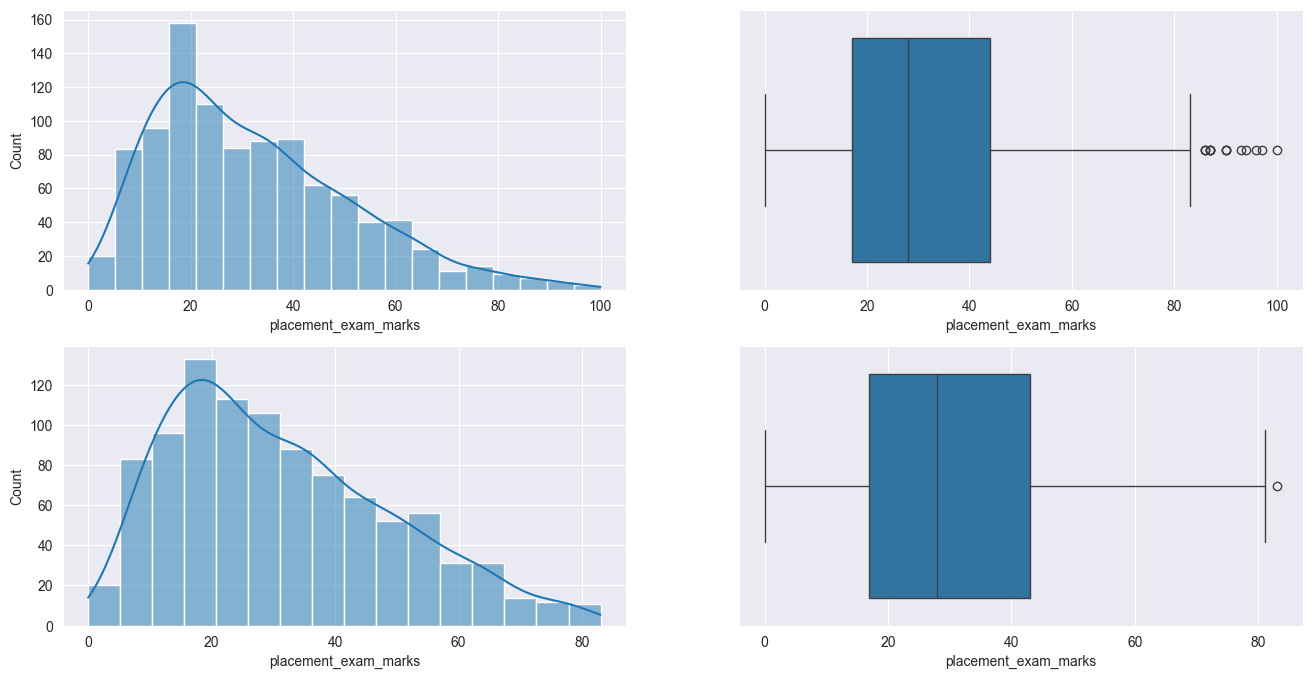

In [51]:
plt.figure(figsize=(16, 8))
plt.subplot(2,2,1)
sns.histplot(x=df['placement_exam_marks'], kde=True)

plt.subplot(2,2,2)
sns.boxplot(x=df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.histplot(x=new_df['placement_exam_marks'], kde=True)

plt.subplot(2,2,4)
sns.boxplot(x=new_df['placement_exam_marks'])

plt.show()

In [52]:
new_df_cap = df.copy()

new_df_cap['placement_exam_marks'] = np.where(
    new_df_cap['placement_exam_marks'] > upper_limit, upper_limit,
    np.where(
        new_df_cap['placement_exam_marks'] < lower_limit,
        lower_limit,
        new_df_cap['placement_exam_marks']
    )
)

In [53]:
new_df_cap.shape

(1000, 3)

<Axes: xlabel='placement_exam_marks'>

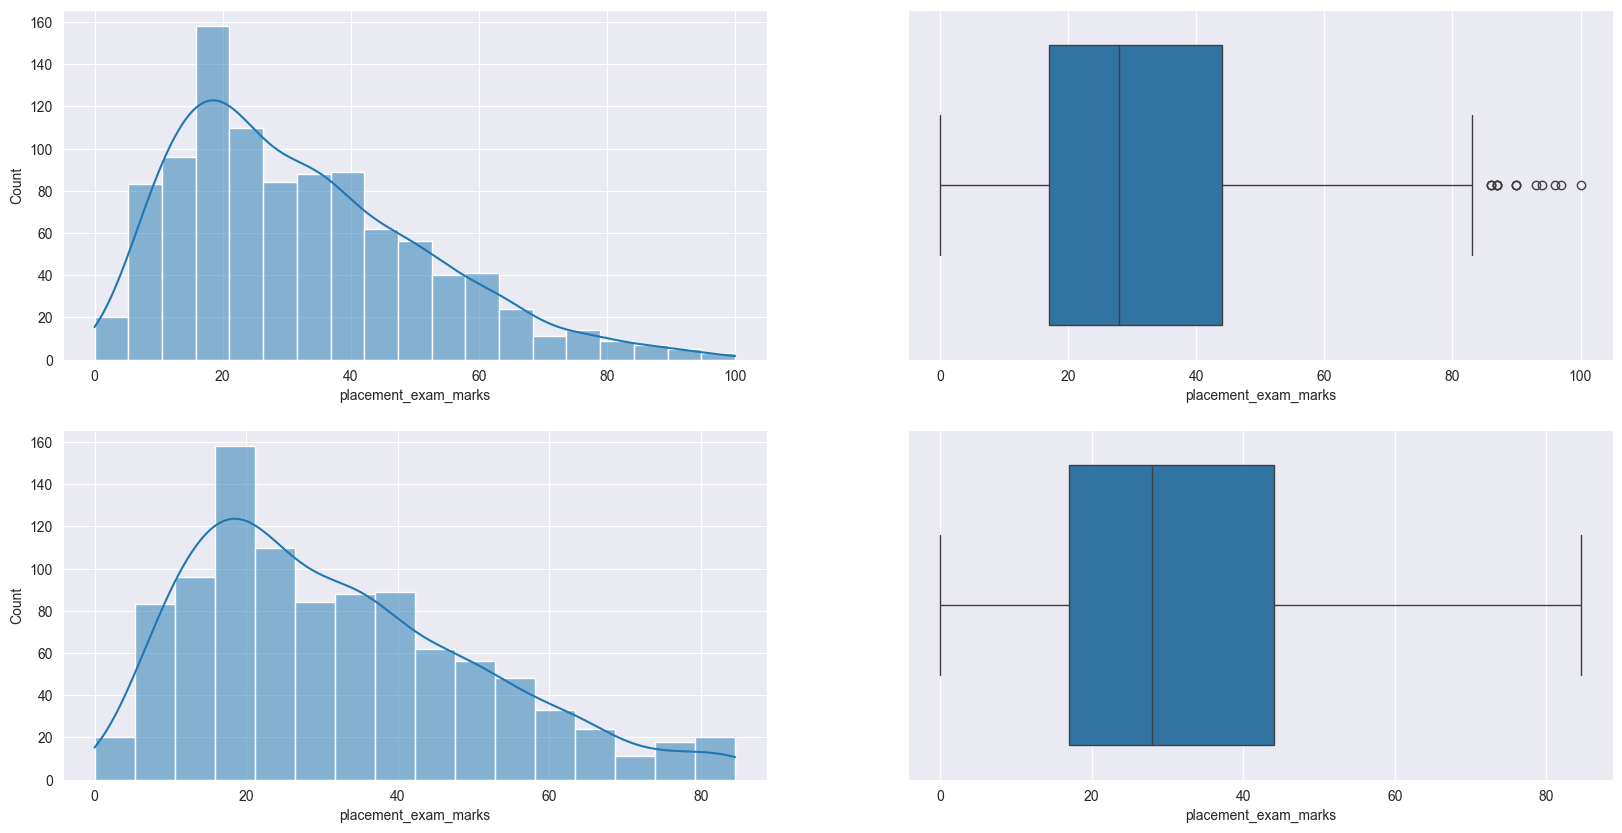

In [56]:
plt.figure(figsize=(20, 10))
plt.subplot(2,2,1)
sns.histplot(x=df['placement_exam_marks'], kde=True)

plt.subplot(2,2,2)
sns.boxplot(x=df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.histplot(x=new_df_cap['placement_exam_marks'], kde=True)

plt.subplot(2,2,4)
sns.boxplot(x=new_df_cap['placement_exam_marks'])